### Dividir el dataset en conjunto de entrenamiento y testing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("Hola/python-ml-course-master/datasets/ads/Advertising.csv")

In [3]:
data

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [4]:
a= np.random.randn(len(data))

In [5]:
a

array([-1.05594347, -1.2338082 ,  0.11987236, -0.05081344,  0.57518543,
        0.65543613,  1.33342997, -0.29507248, -1.30651687, -1.06694785,
       -0.83842536,  0.35826176,  2.0344725 , -0.43388095, -0.4275492 ,
        1.30439461,  0.51279723,  1.46874573, -2.04122405,  0.2649859 ,
       -0.69430082, -1.26026605,  0.69754453, -1.0290913 , -0.53541699,
        0.57408893, -0.28083819,  0.29216858, -0.40241393, -1.17362858,
        0.54637948,  0.69922532, -0.30284468,  0.68184879,  0.02314096,
       -0.2347313 ,  0.0651678 , -3.03760629,  0.06755022, -0.44777418,
        1.58790057,  0.21323858,  0.04183647, -1.70305513, -0.24520367,
        1.34778617,  0.99961837,  1.5373707 ,  1.23388267, -0.63526864,
       -0.36714995,  0.01879906, -0.06567896, -0.24193649, -1.24161114,
       -0.13138009, -2.4004796 ,  0.89467089,  1.27499219, -1.03598684,
        0.35037721, -0.03284762, -0.99903485,  0.44718189,  0.04244123,
        0.53793045,  1.22974186,  0.59113471,  1.25793276, -0.27

(array([ 2.,  4.,  8., 16., 27., 48., 46., 28., 16.,  5.]),
 array([-3.36148244, -2.78217186, -2.20286127, -1.62355069, -1.04424011,
        -0.46492953,  0.11438105,  0.69369163,  1.27300221,  1.8523128 ,
         2.43162338]),
 <BarContainer object of 10 artists>)

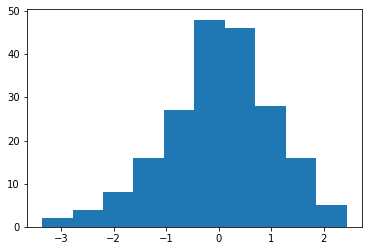

In [6]:
plt.hist(a)

In [7]:
check= (a<0.8)

In [8]:
training= data[check]
testing= data[~check]

In [9]:
len(data)

200

In [10]:
len(training), len(testing)

(158, 42)

In [11]:
import statsmodels.formula.api as smf

In [12]:
lm= smf.ols(formula="Sales~TV+Radio", data= training).fit()

In [13]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.895
Method:                 Least Squares   F-statistic:                     672.9
Date:                Thu, 18 Mar 2021   Prob (F-statistic):           3.84e-77
Time:                        18:59:22   Log-Likelihood:                -304.35
No. Observations:                 158   AIC:                             614.7
Df Residuals:                     155   BIC:                             623.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.7335      0.341      8.024      0.000       2.061       3.406
TV             0.0469      0.002     30.330      0.000       0.044       0.050
Radio          0.1852      0.009     20.060      0.000       0.167       0.203
==============================================================================
Omnibus:                       52.280   Durbin-Watson:                   2.064
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              133.115
Skew:                          -1.373   Prob(JB):                     1.24e-29
Kurtosis:                       6.560   Cond. No.                         440.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
sales_pred= lm.predict(testing)

In [15]:
sales_pred

6      11.506374
12     10.350546
15     20.738157
17     23.274678
40     16.367693
45     15.118675
46      8.776976
47     21.678673
48     16.323315
57     12.681740
58     21.812828
66      8.767509
68     18.968736
76      4.320498
81     14.748043
83     14.184650
84     20.717332
94     10.367010
96     12.656219
106     5.943900
117     6.467535
120    14.328525
125     9.011488
126    10.303270
127     6.497745
129     7.753082
138     9.548018
150    18.482556
151     9.968305
153    18.125507
157    10.005254
161    13.385535
163    17.222366
171    14.324854
174    13.801721
175    24.785689
178    16.146659
181    13.989040
182     6.426830
185    20.707263
192     4.300017
197    12.763406
dtype: float64

In [16]:
SSD= sum((testing["Sales"]- sales_pred)**2)

In [17]:
SSD

124.65140010455235

In [19]:
RSE = np.sqrt(SSD/(len(testing)-2-1))
RSE

1.7877890664926255

In [21]:
Sales_mean= np.mean(testing["Sales"])

In [22]:
error= RSE/Sales_mean

In [23]:
error

0.12868404591720695